### Normal Distribution, Z-Score, Confidence Interval

## 1. The Normal Distribution $N(\mu, \sigma^2)$

A continuous probability distribution symmetric about the mean.

- **Mean ($\mu$):** Location of the peak; for Standard Normal, $\mu = 0$.
    
- **Standard Deviation ($\sigma$):** Spread; for Standard Normal, $\sigma = 1$.
    
- **The Heuristic:** In a normal distribution, ~68% of data falls within $1\sigma$, ~95% within $2\sigma$, and ~99.7% within $3\sigma$.
    

## 2. The Z-Score (Standard Score)

Measures the number of standard deviations an observation ($X$) is from the mean.

$$Z = \frac{X - \mu}{\sigma}$$

### Critical Z-Scores for Value-at-Risk (One-Tailed)

In Risk Management, we focus on the **Left Tail** (potential losses).

- **95% Confidence Level:** $\alpha = 0.05 \implies Z \approx -1.645$
    
- **99% Confidence Level:** $\alpha = 0.01 \implies Z \approx -2.326$
    

## 3. Beyond Normality: Kurtosis and Fat Tails

Real-world market returns are rarely "Normal." They exhibit **Leptokurtosis**.

- **Kurtosis ($K$):** Measures the "tailedness."
    
- **Excess Kurtosis:** $K - 3$.
    
- **Leptokurtic (Fat Tails):** $K > 3$. This means extreme outcomes (black swans) are more likely than the Normal distribution predicts.
    
- **FRM Risk:** If you assume normality but the market is leptokurtic, your **VaR** will be dangerously understated.
    

## 4. Skewness

- **Symmetry:** A normal distribution has a skewness of $0$.
    
- **Negative Skew (Left-Skewed):** The left tail is longer/fatter. This is the "Quant's Nightmare": frequent small gains followed by a catastrophic loss.

- **The Framework:** Definitions for $N(\mu, \sigma^2)$ and the Standard Normal Distribution ($Z \sim N(0, 1)$).
    
- **The Rigorous Formula:** $Z = \frac{X - \mu}{\sigma}$.
    
- **Critical Risk Thresholds:** Specific Z-scores for 95% ($Z \approx -1.645$) and 99% ($Z \approx -2.326$) confidence levels, which are the industry standards for Value-at-Risk (VaR).
    
- **Python Logic:** Included the `scipy.stats.norm.ppf` method we used to verify your environment.

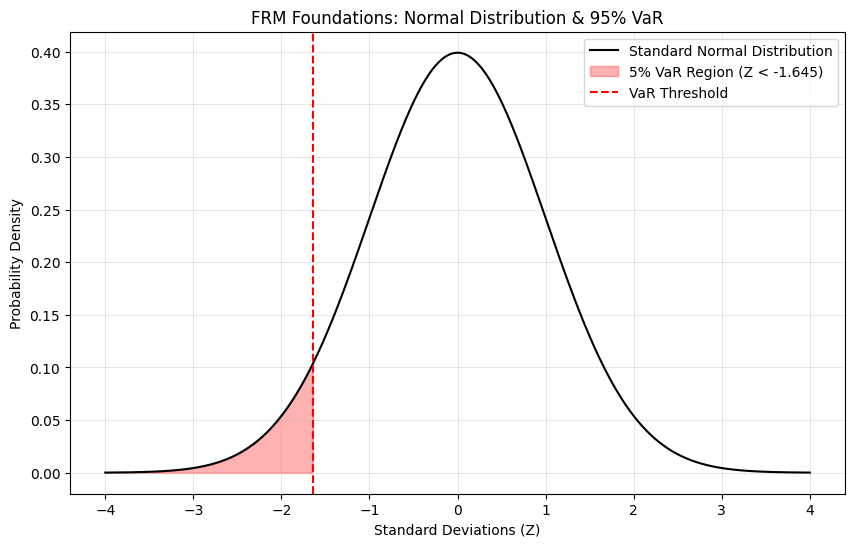

Mathematical Confirmation: The Z-score for a 95% confidence level (left tail) is -1.6449


In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# 1. RIGOROUS HEURISTIC: Define the Distribution
mu = 0       # Mean (Standard Normal)
sigma = 1    # Std Dev (Standard Normal)
confidence_level = 0.95
alpha = 1 - confidence_level # Significance level (5%)

# 2. CALCULATION: Find the Z-score for the 5% tail
# ppf = Percent Point Function (Inverse of CDF)
z_score = stats.norm.ppf(alpha)

# 3. VISUALIZATION
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, mu, sigma)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Standard Normal Distribution', color='black')

# Shade the "Loss Zone" (The Tail)
x_fill = np.linspace(-4, z_score, 100)
y_fill = stats.norm.pdf(x_fill, mu, sigma)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.3, label=f'5% VaR Region (Z < {z_score:.3f})')

plt.title(f'FRM Foundations: Normal Distribution & 95% VaR')
plt.axvline(z_score, color='red', linestyle='--', label='VaR Threshold')
plt.xlabel('Standard Deviations (Z)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Mathematical Confirmation: The Z-score for a 95% confidence level (left tail) is {z_score:.4f}")

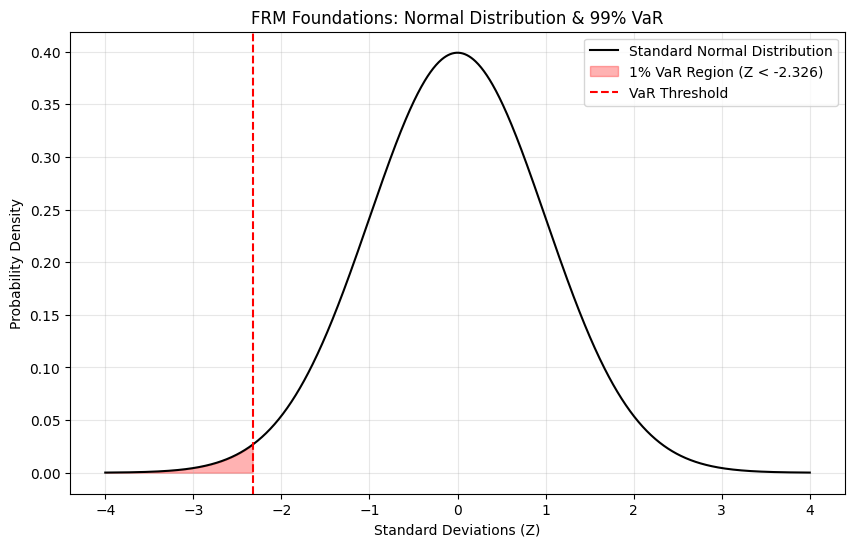

Mathematical Confirmation: The Z-score for a 99% confidence level (left tail) is -2.3263


In [4]:

# 1. RIGOROUS HEURISTIC: Define the Distribution
mu = 0       # Mean (Standard Normal)
sigma = 1    # Std Dev (Standard Normal)
confidence_level = 0.99
alpha = 1 - confidence_level # Significance level (5%)

# 2. CALCULATION: Find the Z-score for the 1% tail
# ppf = Percent Point Function (Inverse of CDF)
z_score = stats.norm.ppf(alpha)

# 3. VISUALIZATION
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, mu, sigma)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Standard Normal Distribution', color='black')

# Shade the "Loss Zone" (The Tail)
x_fill = np.linspace(-4, z_score, 100)
y_fill = stats.norm.pdf(x_fill, mu, sigma)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.3, label=f'1% VaR Region (Z < {z_score:.3f})')

plt.title(f'FRM Foundations: Normal Distribution & 99% VaR')
plt.axvline(z_score, color='red', linestyle='--', label='VaR Threshold')
plt.xlabel('Standard Deviations (Z)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Mathematical Confirmation: The Z-score for a 99% confidence level (left tail) is {z_score:.4f}")